In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

# 5.1 - Introduction to convnets

This notebook contains the code sample found in Chapter 5, Section 1 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). Note that the original text features far more content, in particular further explanations and figures: in this notebook, you will only find source code and related comments.

----

First, let's take a practical look at a very simple convnet example. We will use our convnet to classify MNIST digits, a task that you've already been 
through in Chapter 2, using a densely-connected network (our test accuracy then was 97.8%). Even though our convnet will be very basic, its 
accuracy will still blow out of the water that of the densely-connected model from Chapter 2.

The 6 lines of code below show you what a basic convnet looks like. It's a stack of `Conv2D` and `MaxPooling2D` layers. We'll see in a 
minute what they do concretely.
Importantly, a convnet takes as input tensors of shape `(image_height, image_width, image_channels)` (not including the batch dimension). 
In our case, we will configure our convnet to process inputs of size `(28, 28, 1)`, which is the format of MNIST images. We do this via 
passing the argument `input_shape=(28, 28, 1)` to our first layer.

In [2]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

W0715 23:10:33.324015 4455646656 deprecation_wrapper.py:119] From /anaconda3/envs/pytf/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0715 23:10:33.344952 4455646656 deprecation_wrapper.py:119] From /anaconda3/envs/pytf/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0715 23:10:33.353614 4455646656 deprecation_wrapper.py:119] From /anaconda3/envs/pytf/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0715 23:10:33.371401 4455646656 deprecation_wrapper.py:119] From /anaconda3/envs/pytf/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



Let's display the architecture of our convnet so far:

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


You can see above that the output of every `Conv2D` and `MaxPooling2D` layer is a 3D tensor of shape `(height, width, channels)`. The width 
and height dimensions tend to shrink as we go deeper in the network. The number of channels is controlled by the first argument passed to 
the `Conv2D` layers (e.g. 32 or 64).

The next step would be to feed our last output tensor (of shape `(3, 3, 64)`) into a densely-connected classifier network like those you are 
already familiar with: a stack of `Dense` layers. These classifiers process vectors, which are 1D, whereas our current output is a 3D tensor. 
So first, we will have to flatten our 3D outputs to 1D, and then add a few `Dense` layers on top:

In [4]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

We are going to do 10-way classification, so we use a final layer with 10 outputs and a softmax activation. Now here's what our network 
looks like:

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

As you can see, our `(3, 3, 64)` outputs were flattened into vectors of shape `(576,)`, before going through two `Dense` layers.

Now, let's train our convnet on the MNIST digits. We will reuse a lot of the code we have already covered in the MNIST example from Chapter 
2.

In [6]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [35]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 18s 293us/step - loss: 0.0055 - acc: 0.9990
Epoch 2/5
60000/60000 [==============================] - 17s 283us/step - loss: 0.0046 - acc: 0.9993
Epoch 3/5
60000/60000 [==============================] - 17s 289us/step - loss: 0.0044 - acc: 0.9992
Epoch 4/5
60000/60000 [==============================] - 18s 296us/step - loss: 0.0035 - acc: 0.9993
Epoch 5/5
60000/60000 [==============================] - 18s 302us/step - loss: 0.0028 - acc: 0.9995


### Add two L2 Regularizer with assigned paramters

In [13]:
from keras import regularizers

def buildL2Model(l):
    l2_model = models.Sequential()
    l2_model.add(layers.Conv2D(32, (3, 3), kernel_regularizer=regularizers.l2(l), activation='relu', input_shape=(28, 28, 1)))
    l2_model.add(layers.MaxPooling2D((2, 2)))
    l2_model.add(layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(l), activation='relu'))
    l2_model.add(layers.MaxPooling2D((2, 2)))
    l2_model.add(layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(l), activation='relu'))
    l2_model.add(layers.Flatten())
    l2_model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(l), activation='relu'))
    l2_model.add(layers.Dense(10, kernel_regularizer=regularizers.l2(l), activation='softmax'))

    return(l2_model)


l2_model_high = buildL2Model(.05)
l2_model_low = buildL2Model(.01)


#### Compile L2 Model ( l = .05 )

In [14]:
l2_model_high.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history_high = model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 17s 283us/step - loss: 0.0164 - acc: 0.9948
Epoch 2/5
60000/60000 [==============================] - 17s 276us/step - loss: 0.0136 - acc: 0.9959
Epoch 3/5
60000/60000 [==============================] - 17s 281us/step - loss: 0.0118 - acc: 0.9965
Epoch 4/5
60000/60000 [==============================] - 17s 287us/step - loss: 0.0099 - acc: 0.9971
Epoch 5/5
60000/60000 [==============================] - 17s 291us/step - loss: 0.0095 - acc: 0.9973


#### Compile L2 Model ( l = .01 )

In [15]:
l2_model_low.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history_low = model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 17s 283us/step - loss: 0.0083 - acc: 0.9978
Epoch 2/5
60000/60000 [==============================] - 17s 281us/step - loss: 0.0076 - acc: 0.9979
Epoch 3/5
60000/60000 [==============================] - 17s 288us/step - loss: 0.0060 - acc: 0.9981
Epoch 4/5
60000/60000 [==============================] - 17s 291us/step - loss: 0.0071 - acc: 0.9983
Epoch 5/5
60000/60000 [==============================] - 17s 289us/step - loss: 0.0057 - acc: 0.9986


### Report on Overfitting with Validation Loss

#### Training Loss Report

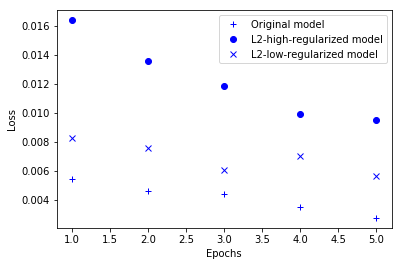

In [36]:
import matplotlib.pyplot as plt
epochs = range(1,6)
original_loss = history.history['loss']
l2_model_high_loss = history_high.history['loss']
l2_model_low_loss = history_low.history['loss']

plt.plot(epochs, original_loss, 'b+', label='Original model') 
plt.plot(epochs, l2_model_high_loss, 'bo', label='L2-high-regularized model')
plt.plot(epochs, l2_model_low_loss, 'bx', label='L2-low-regularized model') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### No val_loss is reported in the history object, use test_loss/acc instead

In [43]:
history_high.history.keys()

dict_keys(['loss', 'acc'])

Let's evaluate the model on the test data:

In [37]:
org_test_loss, org_test_acc = model.evaluate(test_images, test_labels)
high_test_loss, high_test_acc = l2_model_high.evaluate(test_images, test_labels)
low_test_loss, low_test_acc = l2_model_low.evaluate(test_images, test_labels)


10000/10000 [==============================] - 1s 70us/step


In [44]:
import pandas as pd
pd.DataFrame({"Model" : ["Unregularized", "Low-regularized", "High-regularized"],
              "Test Loss": [org_test_loss, low_test_loss,high_test_loss],
              "Test Accuracy" : [org_test_acc, low_test_acc, high_test_acc]})

,Model,Test Loss,Test Accuracy
0,Unregularized,0.080912,0.9922
1,Low-regularized,4.728074,0.1145
2,High-regularized,14.378785,0.1130


As the regularizer parameter gets larger, the training loss grows as epochs and the test loss also increases. Test accuracy also deteriorates, possible due to unoptimized choice of the regularization parameter.